📌 2. Definir Preguntas de Análisis

Aplicaremos diferentes pruebas de hipótesis con base en preguntas concretas:
1. t-test: ¿Los estudiantes que tomaron el curso de preparación obtuvieron mejores calificaciones en matemáticas que los que no lo tomaron?
2. Chi-cuadrado: ¿Existe una relación entre el género y haber tomado el curso de preparación?
3. ANOVA: ¿Las calificaciones en matemáticas varían según el nivel educativo de los padres?

📌 3. Cargar y Explorar los Datos

Primero, carguemos el dataset en Python:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Cargar el dataset
df = pd.read_csv("../data/StudentsPerformance.csv")

# Mostrar las primeras filas
print(df.head())

# Ver información general
print(df.info())

# Descripción estadística de las calificaciones
print(df[['math score', 'reading score', 'writing score']].describe())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

📌 4. Prueba t de Student: Comparar Promedios

📌 Pregunta: ¿Los estudiantes que tomaron el curso de preparación tienen mejores calificaciones en matemáticas?

Hipótesis:
* H₀: No hay diferencia en las calificaciones entre los que tomaron el curso y los que no.
* H₁: Hay una diferencia significativa en las calificaciones.

In [3]:
# Separar los grupos
grupo_prep = df[df["test preparation course"] == "completed"]["math score"]
grupo_no_prep = df[df["test preparation course"] == "none"]["math score"]

# Aplicar prueba t
t_stat, p_value = stats.ttest_ind(grupo_prep, grupo_no_prep)

# Imprimir resultados
print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: Hay una diferencia significativa en las calificaciones.")
else:
    print("No se puede rechazar H₀: No hay evidencia suficiente de diferencia.")

Estadístico t: 5.7046, Valor p: 0.0000
Rechazamos H₀: Hay una diferencia significativa en las calificaciones.


📌 5. Prueba Chi-Cuadrado: Relación Entre Variables Categóricas

📌 Pregunta: ¿El género está relacionado con haber tomado el curso de preparación?

Hipótesis:
* H₀: El género y tomar el curso son independientes.
* H₁: Hay una relación entre género y tomar el curso.

In [4]:
# Crear tabla de contingencia
tabla = pd.crosstab(df["gender"], df["test preparation course"])

# Aplicar prueba chi-cuadrado
chi2_stat, p_value, dof, expected = stats.chi2_contingency(tabla)

# Imprimir resultados
print(f"Estadístico chi-cuadrado: {chi2_stat:.4f}, Valor p: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Existe relación entre género y tomar el curso.")
else:
    print("No se puede rechazar H₀: No hay evidencia de relación.")


Estadístico chi-cuadrado: 0.0155, Valor p: 0.9008
No se puede rechazar H₀: No hay evidencia de relación.


📌 6. Prueba ANOVA: Comparar Más de Dos Grupos

📌 Pregunta: ¿Las calificaciones en matemáticas varían según el nivel educativo de los padres?

Hipótesis:
* H₀: No hay diferencias en las calificaciones entre los distintos niveles educativos.
* H₁: Al menos un grupo tiene una diferencia significativa.

In [5]:
# Crear grupos por nivel educativo de los padres
grupos = [df[df["parental level of education"] == nivel]["math score"] for nivel in df["parental level of education"].unique()]

# Aplicar ANOVA
f_stat, p_value = stats.f_oneway(*grupos)

# Imprimir resultados
print(f"Estadístico F: {f_stat:.4f}, Valor p: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Hay diferencias significativas entre los grupos.")
else:
    print("No se puede rechazar H₀: No hay evidencia de diferencias.")


Estadístico F: 6.5216, Valor p: 0.0000
Rechazamos H₀: Hay diferencias significativas entre los grupos.


📌 7. Visualización de Resultados

Para entender mejor los resultados, generamos gráficos:

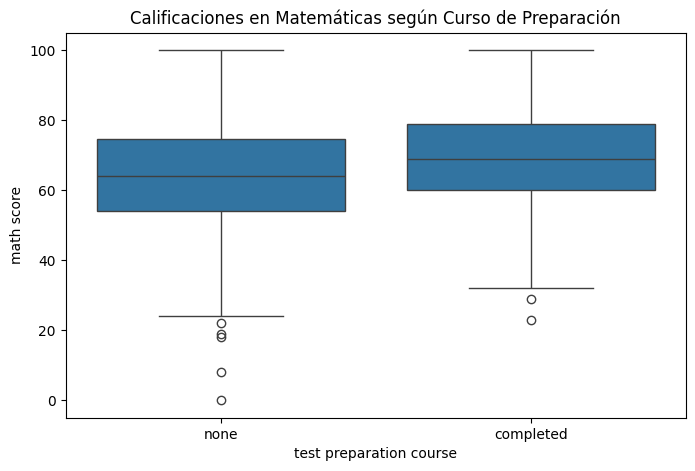

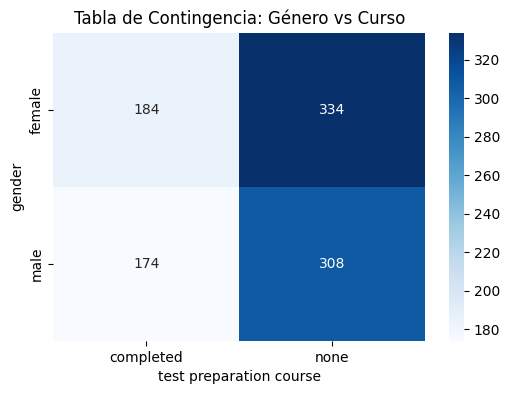

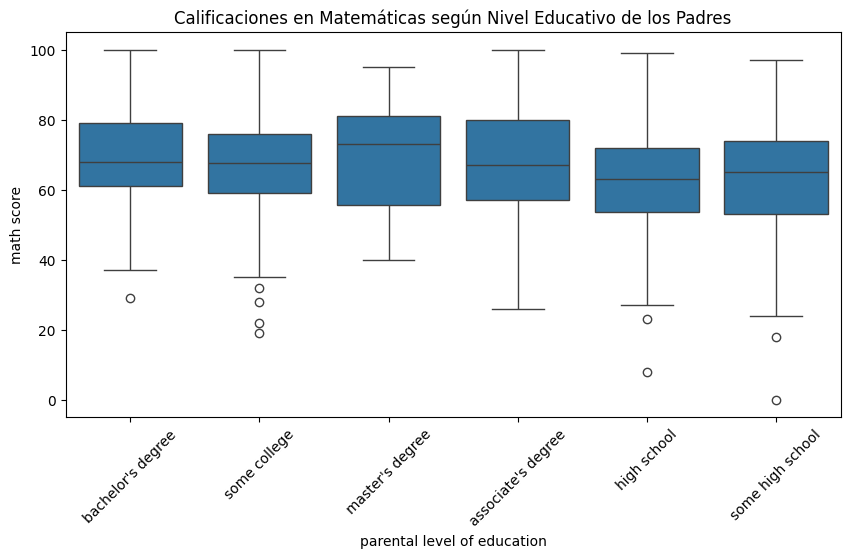

In [6]:
# Boxplot para la prueba t
plt.figure(figsize=(8, 5))
sns.boxplot(x="test preparation course", y="math score", data=df)
plt.title("Calificaciones en Matemáticas según Curso de Preparación")
plt.show()

# Heatmap para la prueba Chi-Cuadrado
plt.figure(figsize=(6, 4))
sns.heatmap(tabla, annot=True, cmap="Blues", fmt="d")
plt.title("Tabla de Contingencia: Género vs Curso")
plt.show()

# Boxplot para ANOVA
plt.figure(figsize=(10, 5))
sns.boxplot(x="parental level of education", y="math score", data=df)
plt.xticks(rotation=45)
plt.title("Calificaciones en Matemáticas según Nivel Educativo de los Padres")
plt.show()